# Student Nationality (Awarded)

In [45]:
import pandas as pd

# load data - PA_Reg_Status_A.csv
df = pd.read_csv('PA_Reg_Status_A.csv')

In [48]:
print(df.head())
print(df.info())



   Student Number     Nationality PA Reg Status   Taught at Site RASP Year
0          500341  UNITED KINGDOM             A  FRENCHAY CAMPUS     10/11
1          500420  UNITED KINGDOM             A  FRENCHAY CAMPUS     10/11
2          501175  UNITED KINGDOM             A  FRENCHAY CAMPUS     10/11
3          501236  UNITED KINGDOM             A  FRENCHAY CAMPUS     10/11
4          501674  UNITED KINGDOM             A  FRENCHAY CAMPUS     10/11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268072 entries, 0 to 268071
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Student Number  268072 non-null  int64 
 1   Nationality     268072 non-null  object
 2   PA Reg Status   268072 non-null  object
 3   Taught at Site  268072 non-null  object
 4   RASP Year       268072 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.2+ MB
None


In [4]:
import pandas as pd

# EDA

# Number of unique values
unique_students = df['Student Number'].nunique()
unique_nationalities = df['Nationality'].nunique()
unique_rasp_years = df['RASP Year'].nunique()

print(f"Number of unique students: {unique_students}")
print(f"Number of unique nationalities: {unique_nationalities}")
print(f"Number of unique RASP Years: {unique_rasp_years}")

# Value counts
nationality_counts = df['Nationality'].value_counts()
taught_at_site_counts = df['Taught at Site'].value_counts()
rasp_year_counts = df['RASP Year'].value_counts()

print("\nValue counts for Nationality:")
print(nationality_counts)

print("\nValue counts for Taught at Site:")
print(taught_at_site_counts)

print("\nValue counts for RASP Year:")
print(rasp_year_counts)


Number of unique students: 101751
Number of unique nationalities: 192
Number of unique RASP Years: 15

Value counts for Nationality:
Nationality
UNITED KINGDOM              203985
MALAYSIA                      5782
NIGERIA                       5623
CHINA                         5131
INDIA                         3218
                             ...  
SCOTLAND                         1
BENIN                            1
TAJIKISTAN                       1
LIECHTENSTEIN                    1
CENTRAL AFRICAN REPUBLIC         1
Name: count, Length: 192, dtype: int64

Value counts for Taught at Site:
Taught at Site
FRENCHAY CAMPUS        201550
GLENSIDE CAMPUS         41624
BOWER ASHTON CAMPUS     21076
ST MATTHIAS CAMPUS       3822
Name: count, dtype: int64

Value counts for RASP Year:
RASP Year
20/21    23654
21/22    23578
19/20    22236
18/19    20505
17/18    19625
22/23    19158
16/17    19145
15/16    18512
14/15    18173
13/14    18122
11/12    17620
12/13    17500
10/11    17008
23

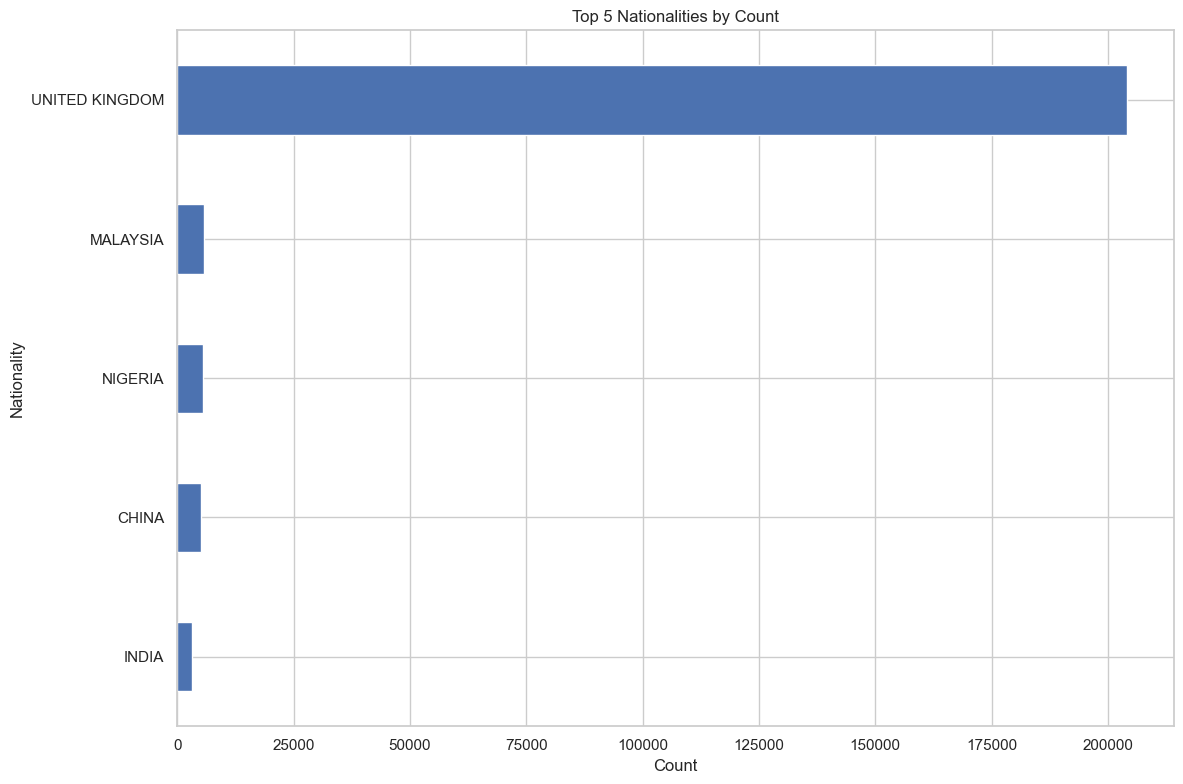

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns



# Visualization
sns.set_theme(style="whitegrid")

# Nationality Counts
plt.figure(figsize=(12, 8))
nationality_counts.sort_values(ascending=True).tail(5).plot(kind='barh')
plt.title('Top 5 Nationalities by Count')
plt.xlabel('Count')
plt.ylabel('Nationality')
plt.tight_layout()
plt.show()


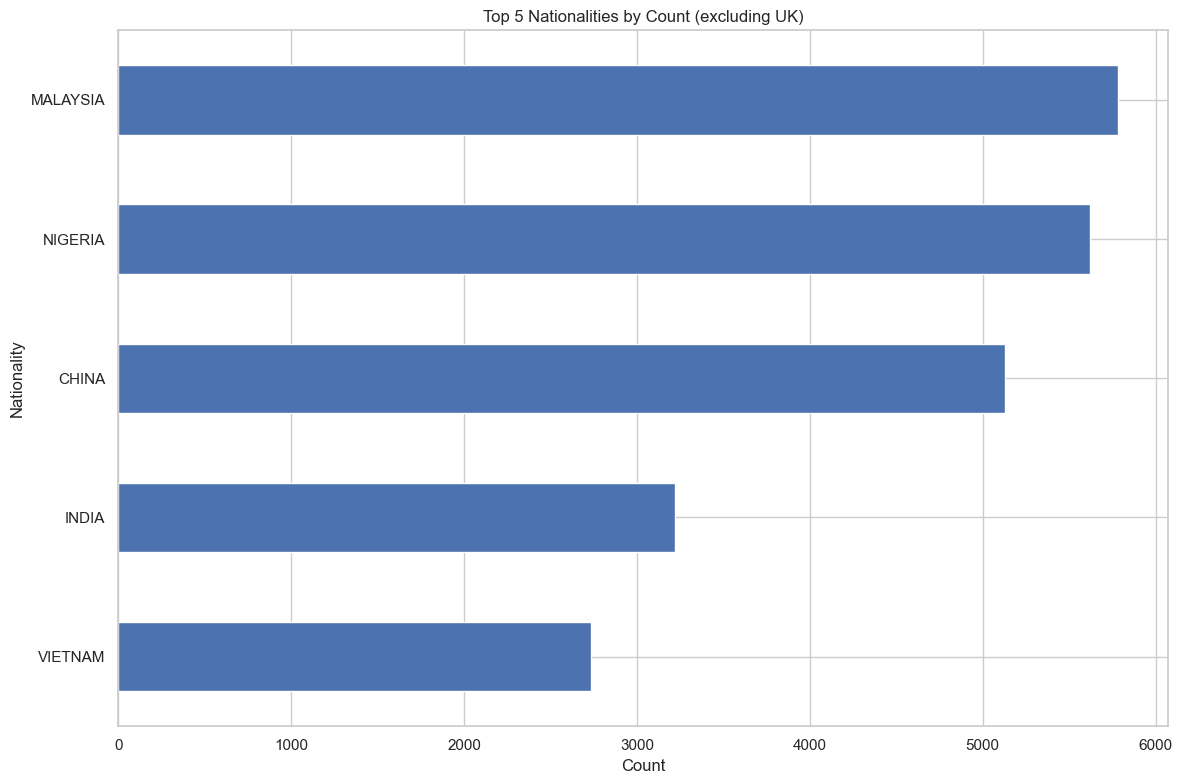

In [6]:
# Nationality Counts - excluding UK
plt.figure(figsize=(12, 8))
nationality_counts_excluding_uk = nationality_counts.drop('UNITED KINGDOM')
nationality_counts_excluding_uk.sort_values(ascending=True).tail(5).plot(kind='barh')
plt.title('Top 5 Nationalities by Count (excluding UK)')
plt.xlabel('Count')
plt.ylabel('Nationality')
plt.tight_layout()
plt.show()

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import cairosvg
import io
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

def svg_to_array(svg_path, max_size=(800, 400)):
    """
    Convert SVG to numpy array via PNG with size limits and trim whitespace
    
    Parameters:
    svg_path: Path to SVG file
    max_size: Maximum dimensions (width, height) for the converted image
    """
    # Convert SVG to PNG in memory with size limit
    png_data = cairosvg.svg2png(
        url=svg_path,
        output_width=max_size[0],
        output_height=max_size[1]
    )
    
    # Convert PNG data to image
    image = Image.open(io.BytesIO(png_data))
    
    # Convert to RGBA if not already
    if image.mode != 'RGBA':
        image = image.convert('RGBA')
    
    # Trim any transparency/whitespace from edges
    image_array = np.array(image)
    non_empty_columns = np.where(image_array.max(axis=0).max(axis=1) > 0)[0]
    non_empty_rows = np.where(image_array.max(axis=1).max(axis=1) > 0)[0]
    
    if len(non_empty_columns) > 0 and len(non_empty_rows) > 0:
        cropBox = (min(non_empty_columns), min(non_empty_rows),
                  max(non_empty_columns) + 1, max(non_empty_rows) + 1)
        image_array = image_array[cropBox[1]:cropBox[3], cropBox[0]:cropBox[2]]
    
    return image_array

def create_flag_bar_chart(nationality_counts, flag_paths, figsize=(12, 8)):
    """
    Create a horizontal bar chart where each bar is filled with the corresponding country's flag.
    
    Parameters:
    nationality_counts: pandas.Series with country names as index and counts as values
    flag_paths: dict mapping country names to flag SVG file paths
    figsize: tuple of figure dimensions
    """
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize, dpi=300)
    
    # Exclude UK and get top 5 nationalities
    nationality_counts_excluding_uk = nationality_counts.drop('UNITED KINGDOM')
    top_5_nationalities = nationality_counts_excluding_uk.sort_values(ascending=True).tail(5)
    
    # Create bars
    y_pos = np.arange(len(top_5_nationalities))
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_5_nationalities.index)
    
    # Plot each bar with flag texture
    for i, (country, count) in enumerate(top_5_nationalities.items()):
        if country in flag_paths:
            try:
                # Load and convert SVG flag
                flag_array = svg_to_array(flag_paths[country])
                
                # Calculate bar dimensions
                bar_height = 0.8
                bar_y = y_pos[i] - bar_height/2
                
                # Create pattern from flag
                flag_extent = [0, count, bar_y, bar_y + bar_height]
                
                # Plot the flag image
                ax.imshow(flag_array, aspect='auto', extent=flag_extent, 
                         interpolation='lanczos')
                
                # Add border around bar
                rect = Rectangle((0, bar_y), count, bar_height, 
                               fill=False, edgecolor='black', linewidth=1)
                ax.add_patch(rect)
                
            except Exception as e:
                print(f"Error processing flag for {country}: {str(e)}")
                # Fill with a solid color if flag processing fails
                rect = Rectangle((0, bar_y), count, bar_height, 
                               fill=True, facecolor='lightgray', edgecolor='black')
                ax.add_patch(rect)
    
    # Customize the plot
    ax.set_title('Top 5 Nationalities by Count (excluding UK)', pad=20)
    ax.set_xlabel('Count')
    ax.set_ylabel('Nationality')
    
    # Set proper limits
    ax.set_xlim(0, max(top_5_nationalities) * 1.1)
    ax.set_ylim(-0.5, len(top_5_nationalities) - 0.5)
    
    plt.tight_layout()
    return fig, ax


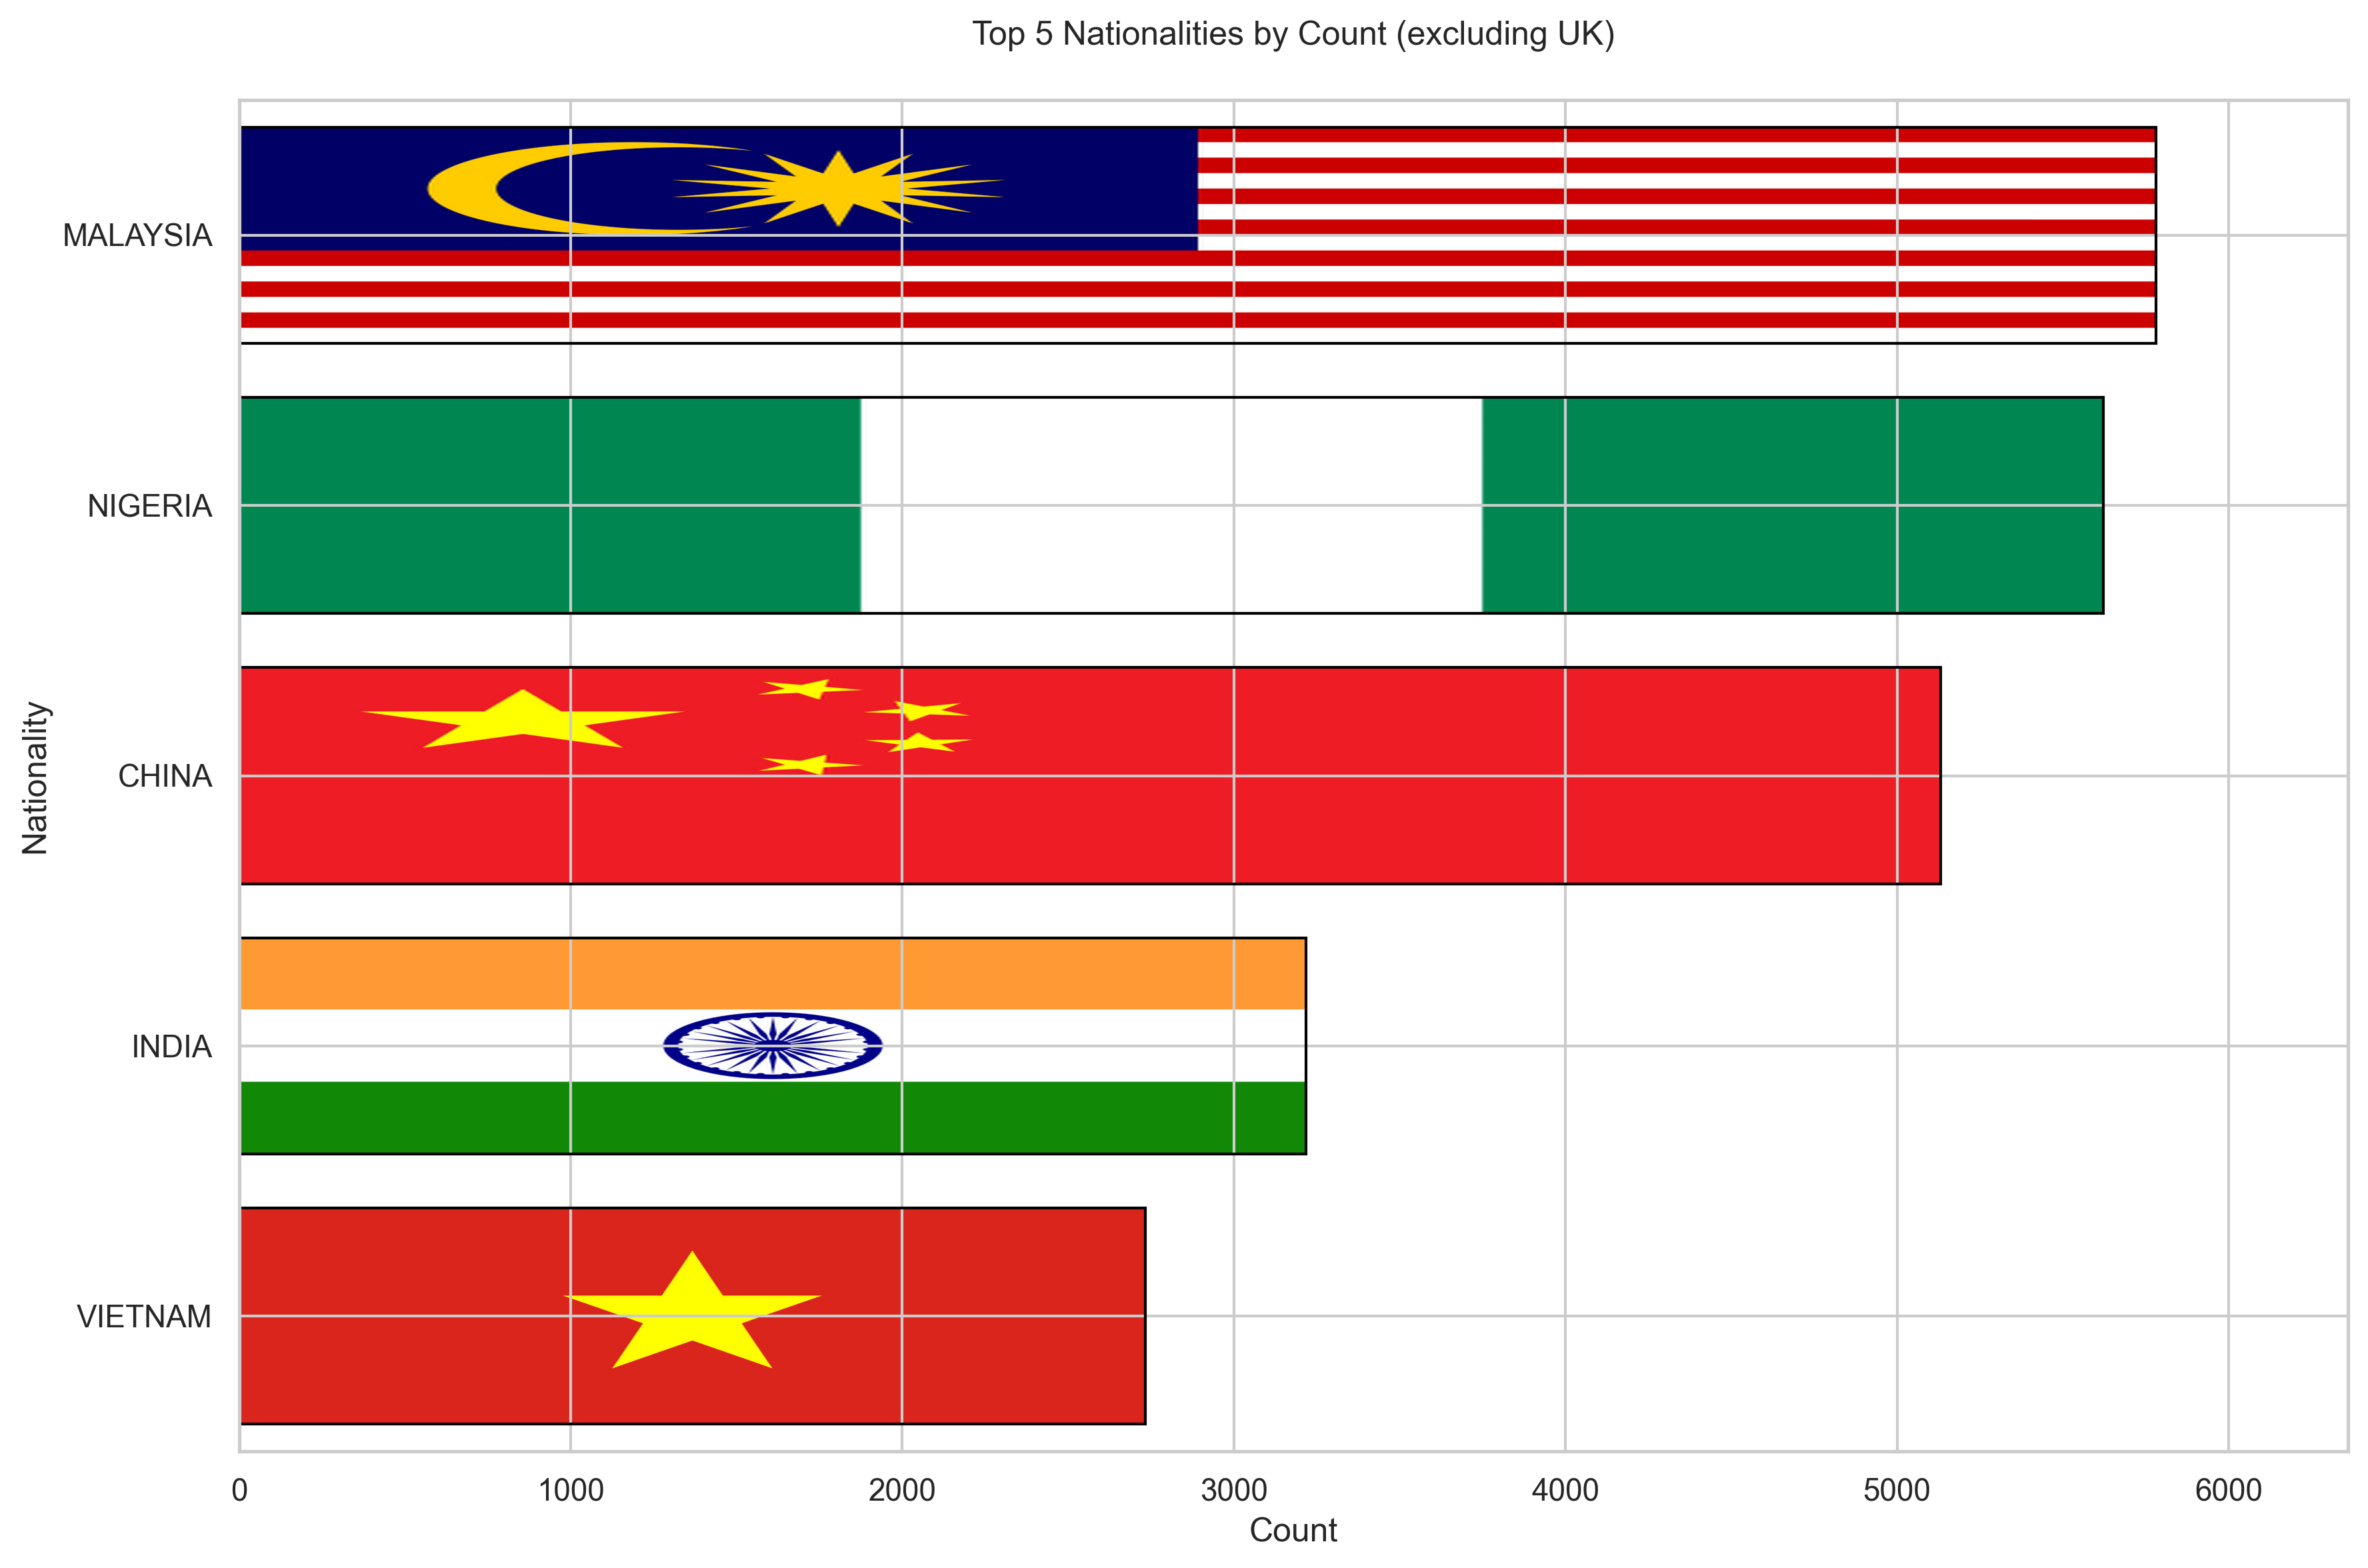

In [12]:

# Example usage:
flag_paths = {
     'MALAYSIA': 'flags/my.svg',
     'NIGERIA': 'flags/ng.svg',
    'CHINA': 'flags/cn.svg',
    'INDIA': 'flags/in.svg',
    'VIETNAM': 'flags/vn.svg'
}

fig, ax = create_flag_bar_chart(nationality_counts, flag_paths)
plt.savefig('nationality_chart.png', dpi=300, bbox_inches='tight')
plt.show()

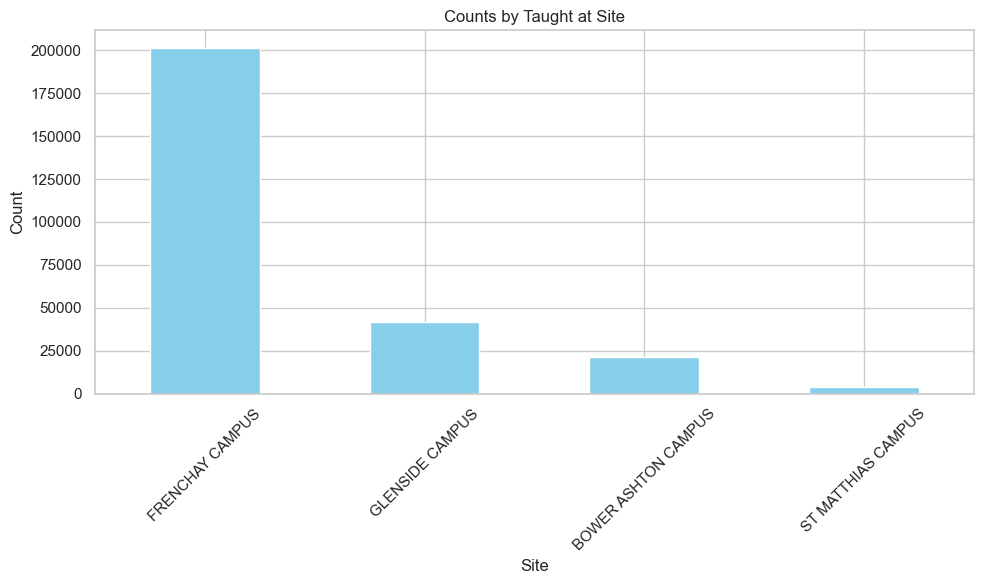

In [13]:

# Taught at Site Counts
plt.figure(figsize=(10, 6))
taught_at_site_counts.plot(kind='bar', color='skyblue')
plt.title('Counts by Taught at Site')
plt.xlabel('Site')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


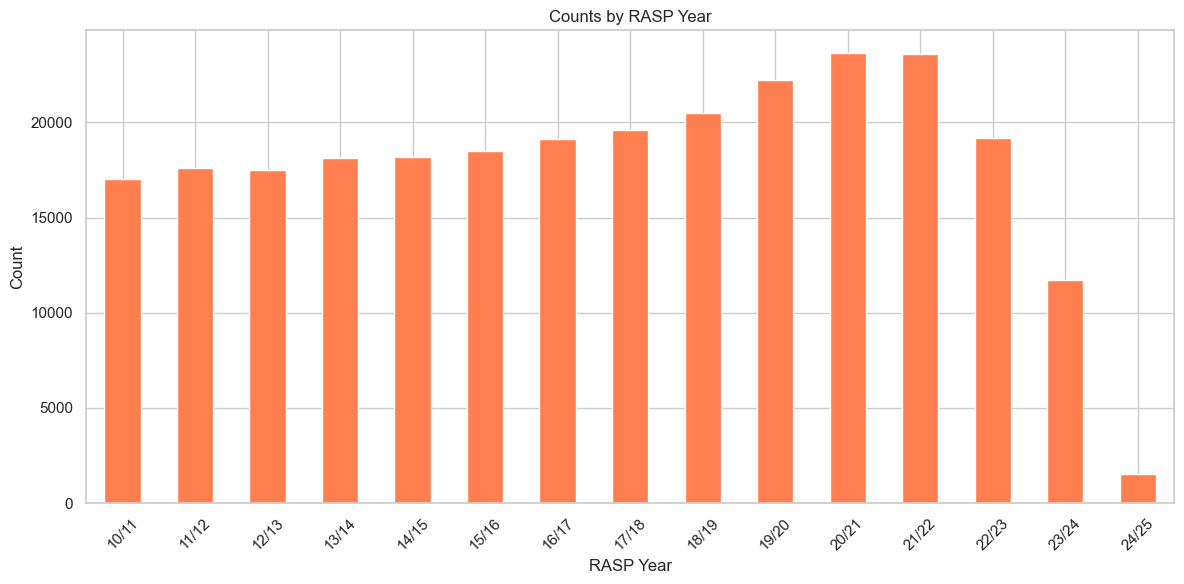

In [14]:

# RASP Year Counts
plt.figure(figsize=(12, 6))
rasp_year_counts.sort_index().plot(kind='bar', color='coral')
plt.title('Counts by RASP Year')
plt.xlabel('RASP Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
# print unique nationalities to clipboard
unique_nationalities = df['Nationality'].unique()
unique_nationalities = pd.Series(unique_nationalities)
unique_nationalities.to_clipboard(index=False, header=False)

In [51]:
# load countries.csv
countries = pd.read_csv('countries.csv')

# load PA_Reg_Status_A.csv
df = pd.read_csv('PA_Reg_Status_A.csv')

# merge all df rows with countries df - on df['Nationality'] == countries['Country']
merged_df = pd.merge(df, countries, left_on='Nationality', right_on='Country', how='left')

#print rows without matches
missing_countries = merged_df[merged_df['Country'].isnull()]
print(len(missing_countries))

# print missing_countries unique Nationality
missing_countries_unique = missing_countries
missing_countries_unique = missing_countries_unique['Nationality'].unique()
missing_countries_unique = pd.Series(missing_countries_unique)
missing_countries_unique.to_clipboard(index=False, header=False)

print(merged_df.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268072 entries, 0 to 268071
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Student Number  268072 non-null  int64 
 1   Nationality     268072 non-null  object
 2   PA Reg Status   268072 non-null  object
 3   Taught at Site  268072 non-null  object
 4   RASP Year       268072 non-null  object
 5   Country         268072 non-null  object
 6   Region          268072 non-null  object
 7   Subregion       268072 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.4+ MB
None


In [54]:
print(merged_df.info())
print(merged_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268072 entries, 0 to 268071
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Student Number  268072 non-null  int64 
 1   Nationality     268072 non-null  object
 2   PA Reg Status   268072 non-null  object
 3   Taught at Site  268072 non-null  object
 4   RASP Year       268072 non-null  object
 5   Country         268072 non-null  object
 6   Region          268072 non-null  object
 7   Subregion       268072 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.4+ MB
None
   Student Number     Nationality PA Reg Status   Taught at Site RASP Year  \
0          500341  UNITED KINGDOM             A  FRENCHAY CAMPUS     10/11   
1          500420  UNITED KINGDOM             A  FRENCHAY CAMPUS     10/11   
2          501175  UNITED KINGDOM             A  FRENCHAY CAMPUS     10/11   
3          501236  UNITED KINGDOM             A  FRENCHAY CAMPUS     10/

In [55]:
# 1. Nationality counts
nationality_counts = merged_df.groupby(['RASP Year', 'Region', 'Subregion', 'Nationality']).size().reset_index(name='Count')

# 2. Region counts per year
region_counts = merged_df.groupby(['RASP Year', 'Region']).size().reset_index(name='Count')

# 3. Subregion counts per year
subregion_counts = merged_df.groupby(['RASP Year', 'Subregion']).size().reset_index(name='Count')

print("Nationality Counts:\n", nationality_counts)
print("\nRegion Counts per Year:\n", region_counts)
print("\nSubregion Counts per Year:\n", subregion_counts)


Nationality Counts:
      RASP Year         Region       Subregion  \
0        10/11         Africa  Central Africa   
1        10/11         Africa  Central Africa   
2        10/11         Africa  Central Africa   
3        10/11         Africa  Central Africa   
4        10/11         Africa  Central Africa   
...        ...            ...             ...   
2075     24/25        Oceania         Oceania   
2076     24/25        Oceania         Oceania   
2077     24/25  South America   South America   
2078     24/25  South America   South America   
2079     24/25  South America   South America   

                                            Nationality  Count  
0                                                ANGOLA      6  
1                                              CAMEROON     11  
2                                                  CHAD      1  
3                                                 CONGO      1  
4                                     EQUATORIAL GUINEA      1  


In [56]:
# Summing the counts
total_nationality_counts = nationality_counts['Count'].sum()
total_region_counts = region_counts['Count'].sum()
total_subregion_counts = subregion_counts['Count'].sum()

# Total number of rows in the original dataframe
total_rows = len(merged_df)

print("Total rows in original dataframe:", total_rows)
print("Sum of counts in nationality_counts:", total_nationality_counts)
print("Sum of counts in region_counts:", total_region_counts)
print("Sum of counts in subregion_counts:", total_subregion_counts)

# Check if the sums match the total number of rows
assert total_nationality_counts == total_rows, "Nationality counts do not match the total number of rows"
assert total_region_counts == total_rows, "Region counts do not match the total number of rows"
assert total_subregion_counts == total_rows, "Subregion counts do not match the total number of rows"

print("All counts are correct.")

Total rows in original dataframe: 268072
Sum of counts in nationality_counts: 268072
Sum of counts in region_counts: 268072
Sum of counts in subregion_counts: 268072
All counts are correct.


In [61]:
df_excluding_uk = merged_df[merged_df['Nationality'] != 'UNITED KINGDOM']
#print(df_excluding_uk.head())
#print(df_excluding_uk.info())

# 1. Nationality counts
internationality_counts = df_excluding_uk.groupby(['RASP Year', 'Region', 'Subregion', 'Nationality']).size().reset_index(name='Count')

# 2. Region counts per year
international_region_counts = df_excluding_uk.groupby(['RASP Year', 'Region']).size().reset_index(name='Count')

# 3. Subregion counts per year
international_subregion_counts = df_excluding_uk.groupby(['RASP Year', 'Subregion']).size().reset_index(name='Count')

# Summing the counts
total_internationality_counts = internationality_counts['Count'].sum()
total_international_region_counts = international_region_counts['Count'].sum()
total_international_subregion_counts = international_subregion_counts['Count'].sum()

# Total number of rows in the original dataframe
total_rows = len(df_excluding_uk)

print("Total rows in original dataframe:", total_rows)
print("Sum of counts in nationality_counts:", total_internationality_counts)
print("Sum of counts in region_counts:", total_international_region_counts)
print("Sum of counts in subregion_counts:", total_international_subregion_counts)

# Check if the sums match the total number of rows
assert total_internationality_counts == total_rows, "Nationality counts do not match the total number of rows"
assert total_international_region_counts == total_rows, "Region counts do not match the total number of rows"
assert total_international_subregion_counts == total_rows, "Subregion counts do not match the total number of rows"

print("All counts are correct.")

Total rows in original dataframe: 64087
Sum of counts in nationality_counts: 64087
Sum of counts in region_counts: 64087
Sum of counts in subregion_counts: 64087
All counts are correct.


In [62]:
print(internationality_counts.head())
print(internationality_counts.info())

  RASP Year  Region       Subregion        Nationality  Count
0     10/11  Africa  Central Africa             ANGOLA      6
1     10/11  Africa  Central Africa           CAMEROON     11
2     10/11  Africa  Central Africa               CHAD      1
3     10/11  Africa  Central Africa              CONGO      1
4     10/11  Africa  Central Africa  EQUATORIAL GUINEA      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   RASP Year    2065 non-null   object
 1   Region       2065 non-null   object
 2   Subregion    2065 non-null   object
 3   Nationality  2065 non-null   object
 4   Count        2065 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 80.8+ KB
None


In [67]:
print(international_region_counts.head())
print(international_region_counts.info())

  RASP Year         Region  Count
0     10/11         Africa    400
1     10/11           Asia    917
2     10/11         Europe   1030
3     10/11    Europe/Asia     15
4     10/11  North America     94
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   RASP Year  108 non-null    category
 1   Region     108 non-null    object  
 2   Count      108 non-null    int64   
dtypes: category(1), int64(1), object(1)
memory usage: 2.6+ KB
None


In [70]:


import pandas as pd
import plotly.express as px

# Ensure 'RASP Year' is treated as a categorical variable with the correct order
rasp_years = international_region_counts['RASP Year'].unique()
international_region_counts['RASP Year'] = pd.Categorical(international_region_counts['RASP Year'], categories=sorted(rasp_years), ordered=True)

# Create the interactive plot
fig = px.line(international_region_counts, 
              x='RASP Year', 
              y='Count', 
              color='Region', 
              line_group='Region',
              hover_name='Region',
              title='Region Counts Over Time')

fig.update_layout(xaxis_title='RASP Year', yaxis_title='Count')

fig.show()

In [75]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Data preparation
df = international_region_counts.copy()
df = df.drop_duplicates()
years = sorted(df['RASP Year'].unique())

# Create figure
fig = go.Figure()

# Add traces for each region
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    fig.add_trace(
        go.Scatter(
            x=region_data['RASP Year'],
            y=region_data['Count'],
            name=region,
            mode='lines+markers',
            visible=True
        )
    )

# Create frames for animation
frames = []
for year in years:
    frame_data = []
    for region in df['Region'].unique():
        region_data = df[df['Region'] == region]
        region_data = region_data[region_data['RASP Year'] <= year]
        
        frame_data.append(
            go.Scatter(
                x=region_data['RASP Year'],
                y=region_data['Count'],
                mode='lines+markers',
                name=region
            )
        )
    frames.append(go.Frame(data=frame_data, name=year))

# Update layout
fig.frames = frames
fig.update_layout(
    title='Region Counts Over Time',
    xaxis_title='RASP Year',
    yaxis_title='Count',
    showlegend=True,
    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'x': 0.1,
        'y': 0,
        'buttons': [{
            'label': 'Play',
            'method': 'animate',
            'args': [None, {
                'frame': {'duration': 1000, 'redraw': True},
                'fromcurrent': True,
                'transition': {'duration': 500},
                'mode': 'immediate'
            }]
        }]
    }],
    sliders=[{
        'currentvalue': {'prefix': 'Year: '},
        'steps': [{'args': [[year], {'frame': {'duration': 0, 'redraw': True},
                                    'mode': 'immediate'}],
                   'label': year,
                   'method': 'animate'} for year in years]
    }]
)

fig.show()

In [77]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Data preparation
df = international_subregion_counts.copy()
df = df.drop_duplicates()
years = sorted(df['RASP Year'].unique())

# Create figure
fig = go.Figure()

# Add traces for each region
for region in df['Subregion'].unique():
    region_data = df[df['Subregion'] == region]
    fig.add_trace(
        go.Scatter(
            x=region_data['RASP Year'],
            y=region_data['Count'],
            name=region,
            mode='lines+markers',
            visible=True
        )
    )

# Create frames for animation
frames = []
for year in years:
    frame_data = []
    for region in df['Subregion'].unique():
        region_data = df[df['Subregion'] == region]
        region_data = region_data[region_data['RASP Year'] <= year]
        
        frame_data.append(
            go.Scatter(
                x=region_data['RASP Year'],
                y=region_data['Count'],
                mode='lines+markers',
                name=region
            )
        )
    frames.append(go.Frame(data=frame_data, name=year))

# Update layout
fig.frames = frames
fig.update_layout(
    title='Region Counts Over Time',
    xaxis_title='RASP Year',
    yaxis_title='Count',
    showlegend=True,
    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'x': 0.1,
        'y': 0,
        'buttons': [{
            'label': 'Play',
            'method': 'animate',
            'args': [None, {
                'frame': {'duration': 1000, 'redraw': True},
                'fromcurrent': True,
                'transition': {'duration': 500},
                'mode': 'immediate'
            }]
        }]
    }],
    sliders=[{
        'currentvalue': {'prefix': 'Year: '},
        'steps': [{'args': [[year], {'frame': {'duration': 0, 'redraw': True},
                                    'mode': 'immediate'}],
                   'label': year,
                   'method': 'animate'} for year in years]
    }]
)

fig.show()

In [83]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Data preparation
df = internationality_counts.copy()
df = df.drop_duplicates()

# Get top 5 nationalities by maximum count
top_nationalities = (df.groupby('Nationality')['Count']
                    .max()
                    .sort_values(ascending=False)
                    .head(10)
                    .index)

# Filter dataframe for top nationalities
df = df[df['Nationality'].isin(top_nationalities)]
years = sorted(df['RASP Year'].unique())

# Create figure
fig = go.Figure()

# Add traces for each nationality
for nationality in top_nationalities:
    nationality_data = df[df['Nationality'] == nationality]
    fig.add_trace(
        go.Scatter(
            x=nationality_data['RASP Year'],
            y=nationality_data['Count'],
            name=nationality,
            mode='lines+markers',
            visible=True
        )
    )

# Create frames for animation
frames = []
for year in years:
    frame_data = []
    for nationality in top_nationalities:
        nationality_data = df[df['Nationality'] == nationality]
        nationality_data = nationality_data[nationality_data['RASP Year'] <= year]
        
        frame_data.append(
            go.Scatter(
                x=nationality_data['RASP Year'],
                y=nationality_data['Count'],
                mode='lines+markers',
                name=nationality
            )
        )
    frames.append(go.Frame(data=frame_data, name=year))

# Update layout
fig.frames = frames
fig.update_layout(
    title='Top 10 Nationalities Count Over Time',
    xaxis_title='RASP Year',
    yaxis_title='Count',
    showlegend=True,
    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'x': 0.1,
        'y': 0,
        'buttons': [{
            'label': 'Play',
            'method': 'animate',
            'args': [None, {
                'frame': {'duration': 1000, 'redraw': True},
                'fromcurrent': True,
                'transition': {'duration': 500},
                'mode': 'immediate'
            }]
        }]
    }],
    sliders=[{
        'currentvalue': {'prefix': 'Year: '},
        'steps': [{'args': [[year], {'frame': {'duration': 0, 'redraw': True},
                                    'mode': 'immediate'}],
                   'label': year,
                   'method': 'animate'} for year in years]
    }]
)

fig.show()

# Plan for PowerBI Animation

1. **Data Preparation**
   - Use `internationality_counts` dataset
   - Keep RASP Year, Nationality, and Count columns
   - No preprocessing needed as PowerBI handles temporal data well

2. **PowerBI Setup Steps**

1. **Import Data**
   - Import the CSV/Excel file into PowerBI
   - Ensure RASP Year is recognized as date/time field

2. **Create Line Chart**
   - Drag 'RASP Year' to X-axis
   - Drag 'Count' to Y-axis
   - Add 'Nationality' to Legend
   - Filter top 10 nationalities by max count

3. **Add Play Axis**
   - Add 'RASP Year' to Play axis control
   - Set animation speed
   - Configure continuous timeline

Here's the specific PowerBI DAX formula to get top 10 nationalities:



In [ ]:
Top10Nationalities = 
CALCULATE(
    VALUES(internationality_counts[Nationality]),
    TOPN(
        10,
        SUMMARIZE(
            internationality_counts,
            internationality_counts[Nationality],
            "MaxCount", MAX(internationality_counts[Count])
        ),
        [MaxCount],
        DESC
    )
)



Then create a visual filter using this measure to show only top 10 nationalities in your line chart.

4. **Animation Settings**
   - Play axis: 0.5 seconds per data point
   - Continuous loop: Off
   - Effect: Linear transition